In [3]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
┌ Warning: [Debug] full_chi_omega setting not found. Assuming false
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\IO.jl:43
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45


DBG: NOT using diagonal terms in λ₀


┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:301) = 0.4356, χLoc_d(1:301) = 0.0644
│ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24860048983264754 ?=? 0.2500077791504396 ?≈? 0.25000777915043954 ≟ 0.24999903238559407"
└ Local EoM check for the first 5 frequencies: 0.0001 [0.0045%], 0.0002 [0.0069%], 0.0002 [0.009%], 0.0003 [0.0112%], 0.0003 [0.0135%]  
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.001142716936 ≟ 0
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
[ Info: d chann

DBG: NOT using diagonal terms in λ₀


In [4]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];
mu_str = "10"

"10"

In [5]:
Fm = F_from_χ(:m, lDGAhelper)
Fd = F_from_χ(:d, lDGAhelper)
λ₀2 = calc_λ0(bubble, 1.0 .* (Fm), lDGAhelper; diag_zero=false);
λ₀Loc = calc_λ0(lDGAhelper.χ₀Loc, Fm, lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, mP, sP)
kGridLoc = gen_kGrid(kGridsStr[1][1], 1)
Σ_ladderLoc = calc_Σ(lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, lDGAhelper.χ_d_loc, lDGAhelper.γ_d_loc, lDGAhelper.χloc_m_sum,
        λ₀Loc, lDGAhelper.Σ_loc, lDGAhelper.gImp, kGridLoc, mP, sP, tc = ΣTail_Plain)

DBG: using diagonal terms in λ₀
DBG: NOT using diagonal terms in λ₀


1×100 OffsetArray(::Matrix{ComplexF64}, 1:1, 0:99) with eltype ComplexF64 with indices 1:1×0:99:
 1.05378-0.566244im  1.02577-0.717929im  …  0.99801-0.032058im

In [6]:
tc_m = sum_kω(kGridLoc, lDGAhelper.χ_m_loc)
tc_d = sum_kω(kGridLoc, lDGAhelper.χ_d_loc)

0.06442648287355293

DBG: NOT using diagonal terms in λ₀


(1, 150)


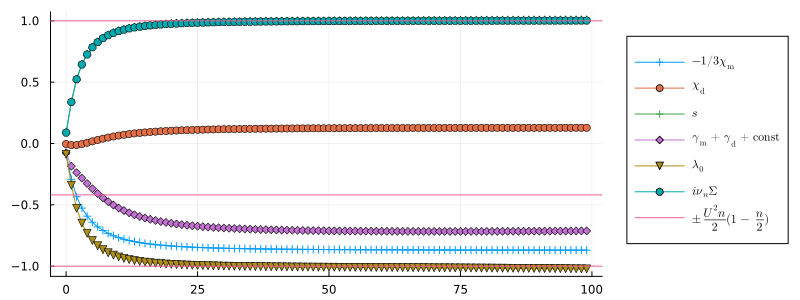

In [7]:
λ₀Loc = calc_λ0(lDGAhelper.χ₀Loc, Fm, lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, mP, sP)
kGridLoc = gen_kGrid(kGridsStr[1][1], 1)
Σ_ladderLoc_parts = calc_Σ_parts(lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, lDGAhelper.χ_d_loc, lDGAhelper.γ_d_loc, lDGAhelper.χloc_m_sum,
        λ₀Loc, lDGAhelper.Σ_loc, lDGAhelper.gImp, kGridLoc, mP, sP, tc = ΣTail_Plain);
gamma_sum = Σ_ladderLoc_parts[:,:,2] .+ Σ_ladderLoc_parts[:,:,4]  .+ Σ_ladderLoc_parts[:,:,5]
plot(xr, real(Σ_ladderLoc_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot(xr, real((-1/3) .* Σ_ladderLoc_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"- 1/3 \chi_\mathrm{m}")
plot!(xr, real(Σ_ladderLoc_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(((Σ_ladderLoc_parts[1,0:99,1] .+ Σ_ladderLoc_parts[1,0:99,3] .+ gamma_sum[1,0:99]) ./ 2) .* iν_arr), markershape=:auto, label = L"s")
plot!(xr, real(gamma_sum[1,0:99] .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}");
plot!(xr, real((Σ_ladderLoc_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
plot!(xr, real(sum(Σ_ladderLoc_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se, -(U)*((1/3)*tc_m+tc_d)], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

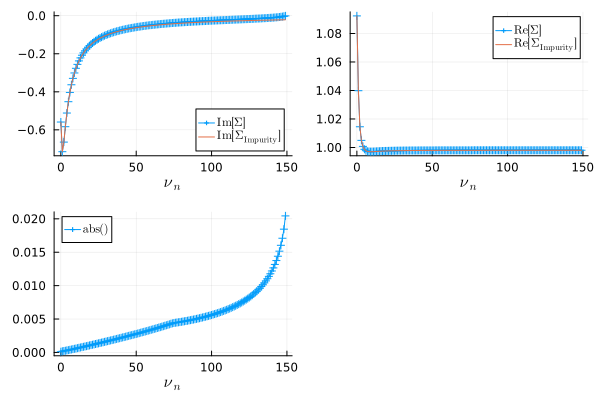

In [8]:
Fm = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], sP, mP.β)
Fd = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], sP, mP.β);
ΣLoc_m, ΣLoc_d = calc_local_EoM(Fm, Fd, lDGAhelper.gImp[1, :], mP, sP)
p1 = plot(imag(0.5 .* (ΣLoc_m .+ ΣLoc_d)),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{Im}[\Sigma]")
plot!(imag(lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]), label=L"\mathrm{Im}[\Sigma_\mathrm{Impurity}]")
p2 = plot(real(0.5 .* (ΣLoc_m .+ ΣLoc_d)),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{Re}[\Sigma]")
plot!(real(lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]), label=L"\mathrm{Re}[\Sigma_\mathrm{Impurity}]")
p3 = plot(abs.(0.5 .* (ΣLoc_m .+ ΣLoc_d) .- lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{abs}()")
plot(p1, p2, p3)

In [9]:
λd_test = 5.5
rhs_d0,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper)
λm_d0  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_d0, lDGAhelper)
rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd_test)
λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd_test)
λm2  = LadderDGA.LambdaCorrection.λm_correction_val2(χm, rhs, lDGAhelper)
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd = λd_test, tc = ΣTail_Full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd = λd_test, tc = ΣTail_Plain);
se2 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd = λd_test, tc = ΣTail_Full)
se_ntc2 = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd = λd_test, tc = ΣTail_Plain);
se_parts =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd=λd_test, tc = ΣTail_Full)
se_parts2 =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd=λd_test, tc = ΣTail_Plain);
se_parts3 =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd=λd_test, tc = ΣTail_λm);
se_parts_d0 =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_d0, λd=0.0);

(1, 150)
(1, 150)
(1, 150)
(1, 0)


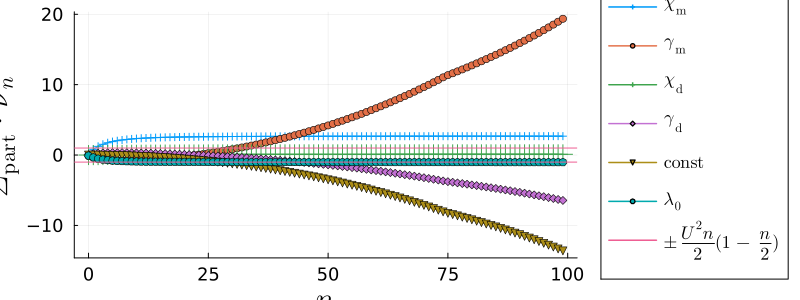

In [10]:
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m}");
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}", markersize=10);
plot!(xr, real(se_parts[1,0:99,4] .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{d}");
plot!(xr, real(se_parts[1,0:99,5] .* iν_arr), markershape=:auto, label = L"\mathrm{const}");
plot!(xr, real((se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

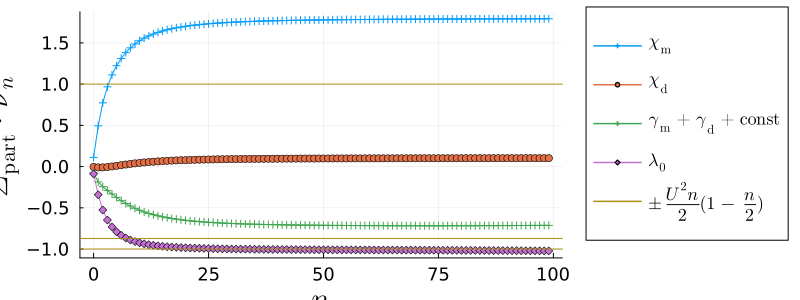

In [11]:
plot(xr, real(se_parts2[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_parts2[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real((se_parts2[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}");
plot!(xr, real((se_parts2[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
#plot!(xr, real(sum(se_parts2[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se, -(2*U/2)*tc_m], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

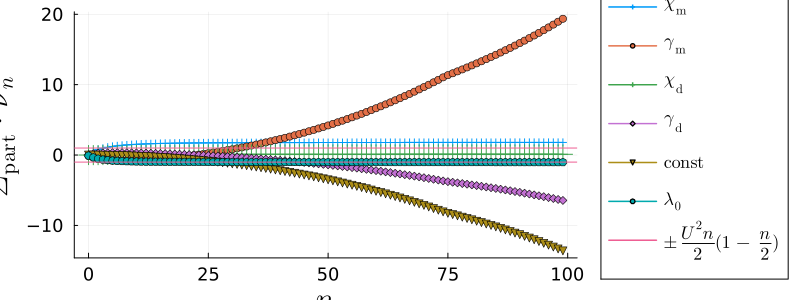

In [12]:
plot(xr, real(se_parts3[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts3[1,0:99,2]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m}");
plot!(xr, real(se_parts3[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}", markersize=10);
plot!(xr, real(se_parts3[1,0:99,4] .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{d}");
plot!(xr, real(se_parts3[1,0:99,5] .* iν_arr), markershape=:auto, label = L"\mathrm{const}");
plot!(xr, real((se_parts3[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

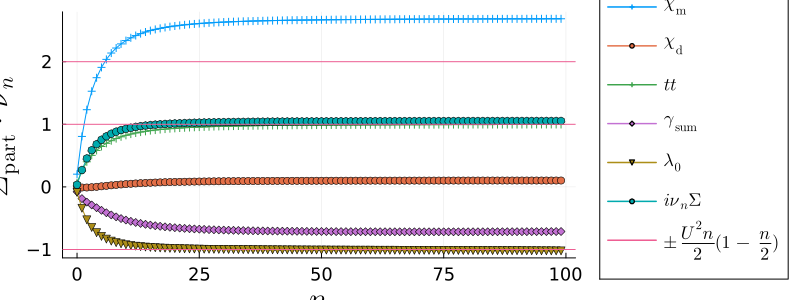

In [13]:
se_gamma_sum = se_parts[:,:,2] .+ se_parts[:,:,4]  .+ se_parts[:,:,5]
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(((1/3) .* se_parts[1,0:99,1]  .+ se_parts[1,0:99,3]) .* iν_arr), markershape=:auto, label = L"tt")
#plot!(xr, real((se_parts[1,0:99,1] .+ se_parts[1,0:99,3] .+ se_gamma_sum[1,0:99] ) .* iν_arr), markershape=:auto, label = L"\gamma_{\mathrm{sum}}")
plot!(xr, real(se_gamma_sum[1,0:99] .* iν_arr), markershape=:auto, label = L"\gamma_{\mathrm{sum}}");
#plot!(xr, real(gamma_sum[1,0:99] .* iν_arr), markershape=:auto, label = L"\gamma_{\mathrm{sum},\mathrm{loc}}");
plot!(xr, real((se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
plot!(xr, real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se, 2*lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

In [14]:
cm = sum_ω(lDGAhelper.χ_m_loc)
cd = sum_ω(lDGAhelper.χ_d_loc)
tt = se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5]
plot(imag(tt), markershape=:auto, ylims=(0,0.4), label=L"\mathrm{Im}[\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}]")
plot!((cm + cd) ./ imag(iν_arr), linewidth=2, label=L"\frac{Un}{2}(1-\frac{n}{2}) = \frac{\sum_{\omega}\left( \chi^{\omega}_{\mathrm{m},\mathrm{loc}} + \chi^{\omega}_{\mathrm{d},\mathrm{loc}}\right)}{\nu}")

┌ Warning: Performing ω sum without previous q-sum. Tail unkown!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\DataTypes.jl:372


LoadError: dbg

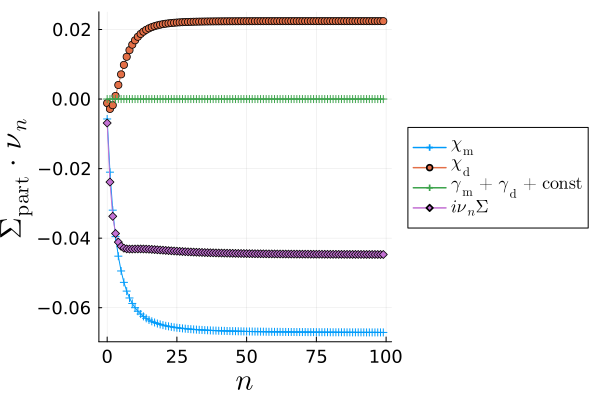

In [15]:
plot(xr, real((se_parts_d0[1,0:99,1] .- se_parts[1,0:99,1]) .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts_d0[1,0:99,3] .- se_parts[1,0:99,3]) .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(((se_parts_d0[1,0:99,2] .+ se_parts_d0[1,0:99,4]  .+ se_parts_d0[1,0:99,5]) .- (se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5])) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}");
plot!(xr, real((sum(se_parts_d0[1,0:99,1:6], dims=2)[:,1] .- sum(se_parts[1,0:99,1:6], dims=2)[:,1]) .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")

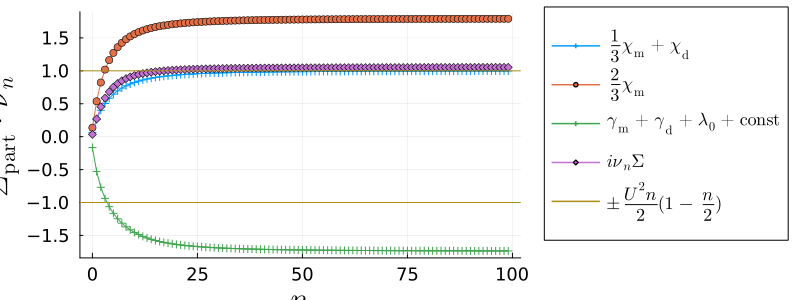

In [16]:
plot(xr, real(((1/3) * se_parts[1,0:99,1] .+ se_parts[1,0:99,3]) .* iν_arr),markershape=:auto, legend=:outerright, label = L"\frac{1}{3} \chi_\mathrm{m} + \chi_\mathrm{d}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(((2/3) * se_parts[1,0:99,1] ) .* iν_arr),markershape=:auto, label = L"\frac{2}{3} \chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5] .+ se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \lambda_0 + \mathrm{const}");
plot!(xr, real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

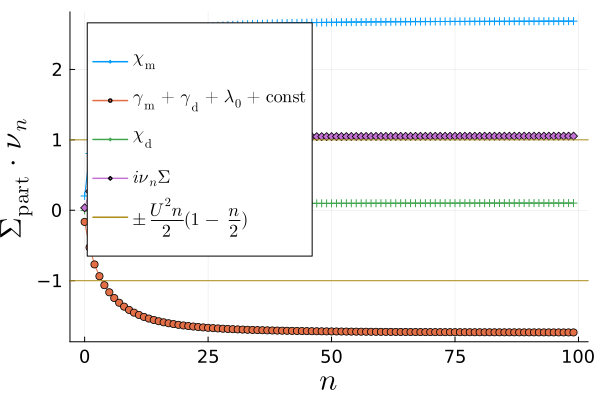

In [17]:
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:topleft, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5] .+ se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \lambda_0 + \mathrm{const}");
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})")

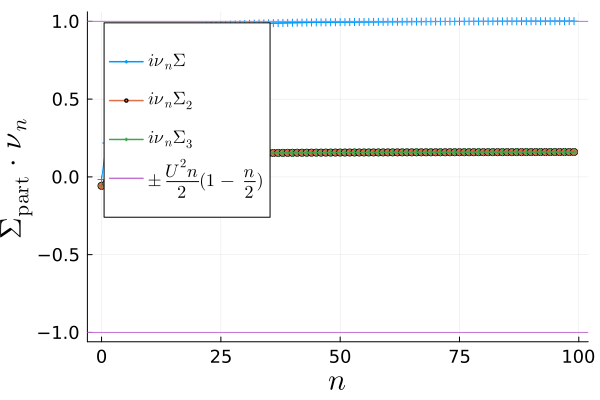

In [18]:
plot(xr,real(sum(se_parts[1,0:99,1:7], dims=2)[:,1] .* iν_arr),markershape=:auto, legend=:topleft, label =L"i \nu_n\Sigma ", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(sum(se_parts2[1,0:99,1:7], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma_2 ")
plot!(xr, real(sum(se_parts3[1,0:99,1:7], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma_3 ")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})")

In [19]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_m_f      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_m_s      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_dm_f     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_dm_s     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = ΣTail_Full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = ΣTail_Plain);

In [20]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2);

In [21]:
function tail_correction_term22(χm_nl::Float64, χm_loc::Float64, χd_nl::Float64, χd_loc::Float64, tf::Vector{ComplexF64})::Matrix{ComplexF64}
    return reshape((χm_nl - χm_loc - (χd_nl - χd_loc)/3) .* tf, 1, length(tf))
end

tail_correction_term22 (generic function with 1 method)

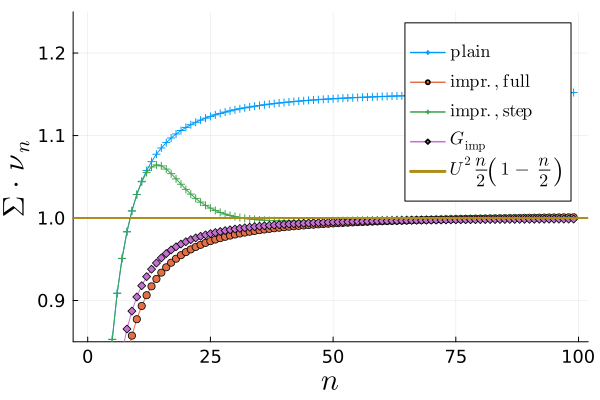

In [22]:

xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]
#se_ntc
λm_test = res_dm_ntc.λm
λd_test = res_dm_ntc.λd
Σλ_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = ΣTail_Plain);
Σλ_tc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = ΣTail_Full);
tc_factor_full = LadderDGA.tail_factor(ΣTail_Full, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_factor_exp_1 = LadderDGA.tail_factor(ΣTail_ExpStep{0.001}, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_factor_exp_2 = LadderDGA.tail_factor(ΣTail_ExpStep{0.05}, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_factor_exp_3 = LadderDGA.tail_factor(ΣTail_ExpStep{0.1}, mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_term_full  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_full)
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)
tc_term_new  = tail_correction_term22(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, sum_kω(kG, χd, λ = λd_test), lDGAhelper.χloc_d_sum, tc_factor_full)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), markershape=:auto, legend=:topright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
#plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_new ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., TTT}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1  ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")

In [23]:
using OffsetArrays
eom_ν_cutoff = LadderDGA.eom_ν_cutoff
Σ_hartree = LadderDGA.Σ_hartree
gridshape = LadderDGA.gridshape
ν0Index_of_ωIndex = LadderDGA.ν0Index_of_ωIndex

@inline eomf_test(U::Float64, γ_m::ComplexF64, γ_m2::ComplexF64, γ_d::ComplexF64, χ_m::Float64, χ_d::Float64, λ₀::ComplexF64)::ComplexF64 = U * (γ_m2 * 1.0 * (1 + U * χ_m) + γ_m * 0.5 * (1 + U * χ_m) - γ_d * 0.5 * (1 - U * χ_d) - 1.5 + 0.5 + λ₀)

function calc_Σ_test(χm::χT,γm::γT,χd::χT,γd::γT, χm_loc, λ₀,
                        Σ_loc::OffsetVector{ComplexF64}, Gνω::GνqT, kG, mP::ModelParameters, sP::SimulationParameters;
                        νmax::Int = eom_ν_cutoff(sP), λm::Float64 = 0.0, λd::Float64 = 0.0, nl_update::Bool=true
) 
    χm.λ != 0 && λm != 0 && error("Stopping self energy calculation: λm = $λm AND χm.λ = $(χm.λ)")
    χd.λ != 0 && λd != 0 && error("Stopping self energy calculation: λd = $λd AND χd.λ = $(χd.λ)")
    Nq, Nω = size(χm)
    ωrange::UnitRange{Int} = -sP.n_iω:sP.n_iω
    γm2 = deepcopy(γm)
    γd2 = deepcopy(γd)
    χm_loc = h.χ_m_loc
    χd_loc = h.χ_d_loc


    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    Σ_ω = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    λm != 0.0 && χ_λ!(χm, λm)
    λd != 0.0 && χ_λ!(χd, λd)
    χm_nl_loc = kintegrate(h.kG, χm,1)
    χd_nl_loc = kintegrate(h.kG, χd,1)
    for qi in axes(γm2, 1)
        for νi in axes(γm2, 2)
            if nl_update
                γm2[qi,νi,:] = γm[qi,νi,:] .* (1 .+ U .* χm_loc[1,:]) ./ (1 .+ U .* χm[qi, :])
            else
                γm2[qi,νi,:] = γm[qi,νi,:] .* (1 .+ U .* χm_loc[1,:]) ./ (1 .+ U .* χm_nl_loc[1, :])
            end
        end
    end
    ΣH = Σ_hartree(mP)
    νdim = ndims(Gνω) > 2 ? length(gridshape(kG)) + 1 : 2 # TODO: this is a fallback for gIm
    fill!(Σ_ω, zero(ComplexF64))
    ω_axis = χm.indices_ω
    for (ωi, ωn) in enumerate(ω_axis)
        νZero = ν0Index_of_ωIndex(ωi, sP)
        νlist = νZero:(sP.n_iν*2)
        length(νlist) > size(Σ_ω, 2) && (νlist = νlist[1:size(Σ_ω, 2)])
        for (νii, νi) in enumerate(νlist)
            for qi = axes(Σ_ω,1)
                @inbounds Kνωq_pre[qi] = eomf_test(U, γm[qi, νi, ωi], γm2[qi, νi, ωi], γd[qi, νi, ωi], χm[qi, ωi], χd[qi, ωi], λ₀[qi, νi, ωi])
            end
            #TODO: find a way to not unroll this!
            LadderDGA.conv_tmp_add!(view(Σ_ω, :, νii - 1), kG, Kνωq_pre, selectdim(Gνω, νdim, (νii - 1) + ωn))
        end
    end
    Σ_ladder = Σ_ω
    Σ_ladder.parent[:, :] = Σ_ladder.parent[:, :] ./ mP.β .+ .+ ΣH 

    λm != 0.0 && reset!(χm)
    λd != 0.0 && reset!(χd)
    return Σ_ladder
end

calc_Σ_test (generic function with 1 method)

In [24]:
res_dm_eom = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_EoM)
se_test_nltc =  calc_Σ(χm, γm, χd, γd, λ₀, h.gLoc_rfft, h; λm = res_dm_eom.λm, λd = res_dm_eom.λd);
se_test_loctc =  calc_Σ_test(χm, γm, χd, γd, h.χ_m_loc, λ₀, h.Σ_loc, h.gLoc_rfft, h.kG, h.mP, h.sP; λm = res_dm_eom.λm, λd = res_dm_eom.λd, nl_update=true);
se_test_full =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = res_dm_f.λm, λd = res_dm_f.λd, tc = ΣTail_Full);
se_test_plain =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = res_dm_ntc.λm, λd = res_dm_ntc.λd, tc = ΣTail_Plain);

LoadError: type Length has no field gLoc_rfft

In [25]:
res_dm_eom

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10837615, λd = 0.40514508, μ = 0.97522716                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.12136664,  Epot_2  =  0.12136664,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.21804172,  Ekin_2  = -0.20903607,  Δ = 2.1087%                 │
│  χ_m    =  0.43833301,  χ_m_loc = 0.43558908,  Δ = 0.3140%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [26]:
res_dm_f

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10751237, λd = 3.67017606, μ = 0.96625725                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.10718378,  Epot_2  =  0.10718378,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.23070192,  Ekin_2  = -0.20903607,  Δ = 4.9270%                 │
│  χ_m    =  0.44542443,  χ_m_loc = 0.43558908,  Δ = 1.1164%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [27]:
l = @layout [
    a{0.35w} b{0.65w}]
lim_se = U^2 * (nden/2) * (1 - nden/2)
xr = collect(axes(se_test_nltc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
simp = lDGAhelper.Σ_loc[xr]


p1 = plot(xr, real(se_test_full[1,:].parent .* iν_arr),  markershape=:auto, label = L"\mathrm{Full:} \;\sum \chi^{\lambda_\mathrm{m}\omega}_{m,q} - \sum\chi^{\omega}_{m,loc}")
plot!(xr, real(se_test_nltc[1,:].parent .* iν_arr),  markershape=:auto, legend=nothing,  label = L"\mathrm{EoM:}\;\tilde{\gamma}/(1+\chi^{\lambda_\mathrm{m}\omega}_{m,q})",xlabel=L"n", ylabel= L"\mathrm{Re} [\Sigma^\nu_{k=0} \cdot i\nu_n]",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_test_loctc[1,:].parent .* iν_arr),  markershape=:auto, label = L"\tilde{\gamma}/(1+\sum \chi^{\lambda_\mathrm{m}\omega}_{m,q})", )
plot!(xr, real(se_test_plain[1,:].parent .* iν_arr),  markershape=:auto, label = L"\mathrm{Plain}")
plot!(xr, real(simp .* iν_arr), markershape=:auto, label = L"\mathrm{imp}")
hline!([lim_se], label=L"\frac{Un}{2}\left(1-\frac{Un}{2}\right)", lw=2)

p2 = plot(xr, real(se_test_full[1,:].parent .* iν_arr),  markershape=:auto, label = L"\mathrm{Full:} \;\sum \chi^{\lambda_\mathrm{m}\omega}_{m,q} - \sum\chi^{\omega}_{m,loc}")
plot!(xr, real(se_test_nltc[1,:].parent .* iν_arr), ylims=(lim_se-0.01, lim_se+0.01),  markershape=:auto, legend=:outerright, label = L"\mathrm{EoM:}\;\tilde{\gamma}/(1+\chi^{\lambda_\mathrm{m}\omega}_{m,q})", xlabel=L"n", ylabel= L"\mathrm{Re} [\Sigma^\nu_{k=0} \cdot i\nu_n]",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_test_loctc[1,:].parent .* iν_arr),  markershape=:auto, label = L"\tilde{\gamma}/(1+\sum \chi^{\lambda_\mathrm{m}\omega}_{m,q})" )
plot!(xr, real(se_test_plain[1,:].parent .* iν_arr),  markershape=:auto, label = L"\mathrm{Plain}")
plot!(xr, real(simp .* iν_arr), markershape=:auto, label = L"\mathrm{Impurity}")
hline!([lim_se], label=L"\frac{Un}{2}\left(1-\frac{Un}{2}\right)", lw=2)

p = plot(p1, p2, layout=l, size=(1400,400), left_margin=10mm, bottom_margin=8mm)
savefig("sig_tail_comp_mu$mu_str.pdf")
display(p)

LoadError: UndefVarError: `se_test_nltc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

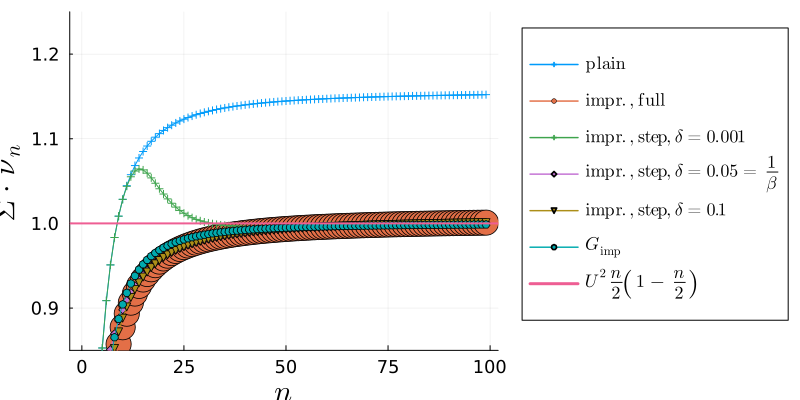

In [28]:
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), size=(800,400), markershape=:auto, legend=:outerright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, markersize=14, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.001")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.05=\frac{1}{\beta}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.1")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")

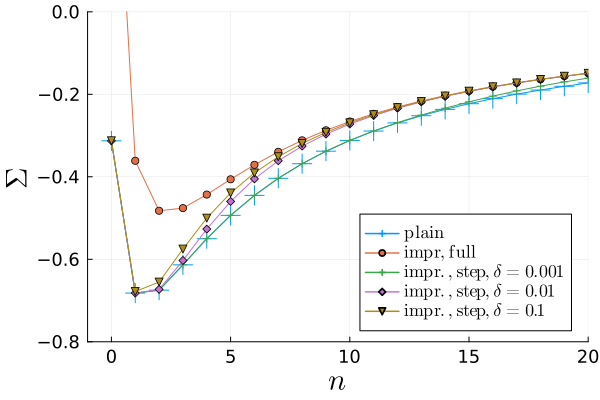

In [29]:
plot(xr, imag(Σλ_ntc[1,:].parent), xlims=(-1,20), ylims=(-0.8,0.0),markershape=:auto, markersize=10, legend=:bottomright,label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr, full}")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.001")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.01")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.1")
#plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")

In [22]:
reset!(χm)
reset!(χd)

In [43]:
λd_min_sample = LadderDGA.LambdaCorrection.get_λ_min(χd)
NSample = 100
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=NSample, λmin=λd_min_sample, λmax=1.0, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=NSample, λmin=λd_min_sample, λmax=1.0, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=NSample, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=0.0);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=NSample, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=0.0);
xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=NSample, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=0.0);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=NSample, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.2}, λmax=0.0);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=NSample, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=0.0);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=NSample, λmin=λd_min_sample, λmax=0.0, tc=ΣTail_EoM);

In [44]:
μ_new, G_ladder, Σ_ladder = LadderDGA.LambdaCorrection.calc_G_Σ(χm, γm, χd, γd, λ₀, 0.0, 0.0, lDGAhelper, tc=ΣTail_ExpStep{0.15});
nd = filling_pos(G_ladder[:,0:600],  lDGAhelper.kG, lDGAhelper.mP.U, lDGAhelper.mP.μ, lDGAhelper.mP.β)

0.9983425640000371

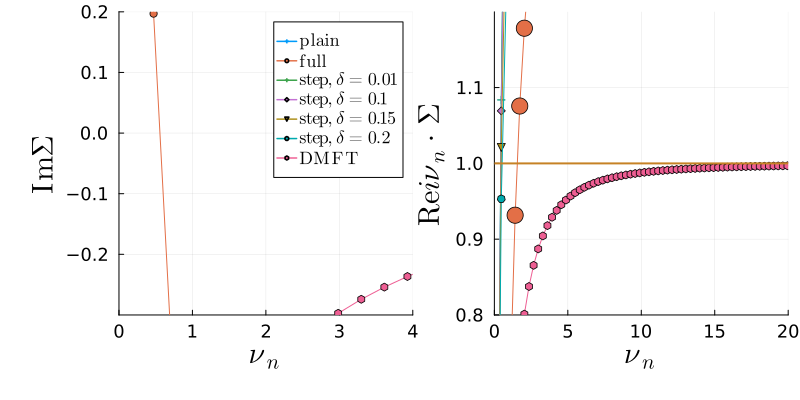

In [45]:
se_01 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_Plain)
se_02 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_Full)
se_03 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.01})
se_04 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.1})
se_05 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.15})
se_06 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.2});
se_07 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{1.0});

inu = LadderDGA.iν_array(χm.β, first(axes(se_01,2)):last(axes(se_01,2)))
xr = imag(inu)
p1 = plot(xr, imag(se_01[1,:].parent), label=L"\mathrm{plain}" , left_margin = 10mm, bottom_margin=10mm,  xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12,markershape=:auto, xlims=(0,4), ylims=(-0.3,0.2), xlabel=L"\nu_n", ylabel=L"\mathrm{Im}\Sigma")
plot!(p1, xr, imag(se_02[1,:].parent), label=L"\mathrm{full}" ,markershape=:auto)
plot!(p1, xr, imag(se_03[1,:].parent), label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr, imag(se_04[1,:].parent), label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr, imag(se_05[1,:].parent), label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p1, xr, imag(se_06[1,:].parent), label=L"\mathrm{step}, \delta=0.2", markershape=:auto)
plot!(p1, xr, imag( lDGAhelper.gImp[1,0:99]), markershape=:auto, label=L"\mathrm{DMFT}")

p2 = plot(xr, real(inu .* se_01[1,:].parent), label=L"\mathrm{plain}" ,xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12,legend=nothing, markershape=:auto, xlims=(0,20), ylims=(0.8,1.2), xlabel=L"\nu_n", ylabel=L"\mathrm{Re} i\nu_n \cdot \Sigma")
plot!(p2, xr, real(inu .* se_02[1,:].parent), label=L"\mathrm{full}" ,markershape=:auto, markersize=9)
plot!(p2, xr, real(inu .* se_03[1,:].parent), label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr, real(inu .* se_04[1,:].parent), label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr, real(inu .* se_05[1,:].parent), label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p2, xr, real(inu .* se_06[1,:].parent), label=L"\mathrm{step}, \delta=0.2", markershape=:auto)
plot!(p2, xr, real(inu .* lDGAhelper.gImp[1,0:99]), markershape=:auto, label=L"\mathrm{DMFT}")
lim_se = U^2 * (nden/2) * (1 - nden/2);
lin_se_2 = U^2 * (nd/2) * (1 - nd/2);
hline!(p2, [lim_se], label=L"U^2 \frac{n}{2} \left( 1 - \frac{n}{2} \right)", lw=2)

plot(p1, p2, size=(800,400))

In [46]:
res_m

LoadError: UndefVarError: `res_m` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
indmin = map(x-> findmin(x)[2],[abs.(fr_dm_01), abs.(fr_dm_02), abs.(fr_dm_03), abs.(fr_dm_04), abs.(fr_dm_07), abs.(fr_dm_08)])
xmin = minimum([xr_dm_01[indmin[1]], xr_dm_02[indmin[2]], xr_dm_03[indmin[3]], xr_dm_04[indmin[4]], xr_dm_07[indmin[5]], xr_dm_08[indmin[6]]])
xmax = maximum([xr_dm_01[indmin[1]], xr_dm_02[indmin[2]], xr_dm_03[indmin[3]], xr_dm_04[indmin[4]], xr_dm_07[indmin[5]], xr_dm_08[indmin[5]]])
xmin = xmin - abs(xmin)/10
xmax = xmax + abs(xmax)/10

p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.1,.1), xlims=(-4,1), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.01,.01), xlims=(-2,0), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, p2, size=(1400,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison.pdf")
display(p)

In [ ]:
tl = []
ll = []
for λd_i in xr_dm_01[1:5:end]
    ωn2_tail = LadderDGA.ω2_tail(χm)
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper; λd=λd_i)
    λm_i   = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, lDGAhelper.kG, ωn2_tail)
    
    se_01 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_i, λd = λd_i, tc = ΣTail_Plain)
    push!(tl, se_01)
    push!(ll, λd_i)
end

In [ ]:
p = plot(imag(tl[1][1,:].parent), ylims=(-0.5,0.5), xlims=(0,20), markershape=:auto, label="$(ll[1])")
for (i,tt) in enumerate(tl[2:end])
    plot!(p, imag(tt[1,:].parent), markershape=:auto, label="$(ll[i])")
end
display(p)

In [ ]:
p = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.02,.02), xlims=(-2.5,0), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p, xr_dm_05, fr_dm_05, label=L"\mathrm{step}, \delta=0.001", markershape=:auto)

savefig("delta_expstep_comparison.pdf")
display(p)

In [ ]:
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = :full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = :plain);

In [ ]:
using OffsetArrays
function getData(χm,γm,χd, γd,λ₀, h, λd_i; 
        tc=LadderDGA.default_Σ_tail_correction(), 
        verbose::Bool = false)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    νmax::Int = LadderDGA.eom_ν_cutoff(h.sP)

    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = LadderDGA.iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor_term = LadderDGA.tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν)

    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
    λm_i   = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    χm_sum = sum_kω(h.kG, χm, λ = λm_i)
    χd_sum = sum_kω(h.kG, χd, λ = λd_i)
    PP2 = real(χd_sum + χm_sum) / 2
        verbose && println("$λm_i / $λd_i")
        # @timeit to "dbg3" μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_factor, χm, γm, χd, γd, λ₀, λm_i, λd_i, h; fix_n = fix_n)
        if isfinite(λm_i)
            (λm_i != 0) && χ_λ!(χm, λm_i)
            (λd_i != 0) && χ_λ!(χd, λd_i)
            if !(tc == ΣTail_EoM)
                tc_term  = LadderDGA.tail_correction_term(sum_kω(h.kG, χm), h.χloc_m_sum, tc_factor_term)
                LadderDGA.calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, tc_term, h.gLoc_rfft, h.kG, h.mP, h.sP)
            else
                LadderDGA.calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, h.χ_m_loc, λ₀, h.gLoc_rfft, h.kG, h.mP, h.sP)
            end
            (λm_i != 0) && reset!(χm)
            (λd_i != 0) && reset!(χd)
            μ_new = LadderDGA.G_from_Σladder!(G_ladder, Σ_ladder, h.Σ_loc, h.kG, h.mP; fix_n = true, μ = h.mP.μ, n = h.mP.n)
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            return λm_i,μ_new,Ekin_1,PP2,Epot_1,Epot_2,G_ladder,Σ_ladder
        else
            return NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
        end
end

In [53]:
xarr = []
Epot2_l = []
Epot1_l = []
Ekin1_l = []
Σ_l     = []
Σ0_l     = []
G_l     = []
μ_l     = []
PP2_l   = []
λm_l    = []

xarr_plain = []
Epot2_plain_l = []
Epot1_plain_l = []
Σ_plain_l     = []
Σ0_plain_l    = []
λm_plain_l    = []
xarr_full = []
Epot2_full_l = []
Epot1_full_l = []
Σ0_full_l    = []
λm_full_l    = []
xarr_exp = []
Epot2_exp_l = []
Epot1_exp_l = []
Σ0_exp_l    = []
λm_exp_l    = []
reset!(χm)
reset!(χd)
for λd_i in xr_dm_01
    λm_i,μ_new,Ekin_1,PP2,Epot_1,Epot_2,G_ladder,Σ_ladder = getData(χm,γm,χd, γd,λ₀, lDGAhelper, λd_i,tc=ΣTail_EoM)
    if !isnan(λm_i)
        push!(xarr, λd_i)
        push!(Epot2_l,Epot_2)
        push!(Epot1_l,Epot_1)
        push!(Σ_l,Σ_ladder)
        push!(Σ0_l,maximum(imag(Σ_ladder[:,0])))
        push!(G_l,G_ladder)
        push!(μ_l,μ_new)
        push!(PP2_l,PP2)
        push!(λm_l,λm_i)
    end
    λm_i,_,Ekin_1,_,Epot_1,Epot_2,_,Σ_ladder = getData(χm,γm,χd, γd,λ₀, lDGAhelper, λd_i,tc=ΣTail_Plain)
    if !isnan(λm_i)
        push!(xarr_plain,λd_i)
        push!(Epot2_plain_l,Epot_2)
        push!(Epot1_plain_l,Epot_1)
        push!(Σ_plain_l,Σ_ladder)
        push!(Σ0_plain_l,maximum(imag(Σ_ladder[:,0])))
        push!(λm_plain_l,λm_i)
    end
    λm_i,_,Ekin_1,_,Epot_1,Epot_2,_,Σ_ladder = getData(χm,γm,χd, γd,λ₀, lDGAhelper, λd_i,tc=ΣTail_Full)
    if !isnan(λm_i)
        push!(xarr_full,λd_i)
        push!(Epot2_full_l,Epot_2)
        push!(Epot1_full_l,Epot_1)
        push!(Σ0_full_l,maximum(imag(Σ_ladder[:,0])))
        push!(λm_full_l,λm_i)
    end
    λm_i,_,Ekin_1,_,Epot_1,Epot_2,_,Σ_ladder = getData(χm,γm,χd, γd,λ₀, lDGAhelper, λd_i,tc=ΣTail_ExpStep{0.5})
    if !isnan(λm_i)
        push!(xarr_exp,λd_i)
        push!(Epot2_exp_l,Epot_2)
        push!(Epot1_exp_l,Epot_1)
        push!(Σ0_exp_l,maximum(imag(Σ_ladder[:,0])))
        push!(λm_exp_l,λm_i)
    end
end

In [54]:
res_dm_s     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10837615, λd = 0.40514508, μ = 0.97522716                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.12136664,  Epot_2  =  0.12136664,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.21804172,  Ekin_2  = -0.20903607,  Δ = 2.1087%                 │
│  χ_m    =  0.43833301,  χ_m_loc = 0.43558908,  Δ = 0.3140%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [55]:
res_dm_p     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{0.5}, λd_min=-6.4)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10705003, λd = 6.32740288, μ = 0.96932396                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.09875218,  Epot_2  =  0.09875218,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.22093724,  Ekin_2  = -0.20903607,  Δ = 2.7679%                 │
│  χ_m    =  0.44964023,  χ_m_loc = 0.43558908,  Δ = 1.5873%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


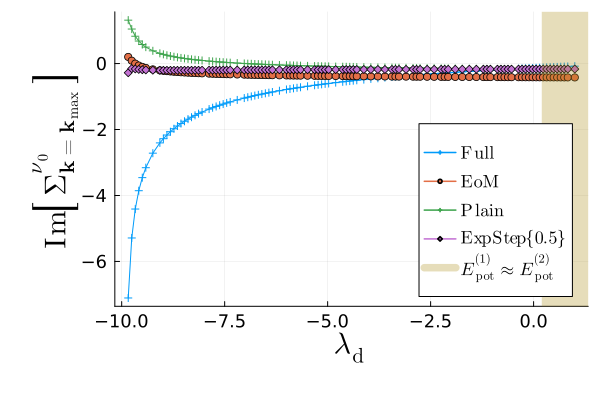

In [56]:
p = plot(xarr,Σ0_full_l, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\mathrm{Im} \left[ \Sigma^{\nu_0}_{\mathbf{k} = \mathbf{k}_{\mathrm{max}}}\right]", label=L"\mathrm{Full}",
                        xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm)
plot!(xarr,Σ0_l, markershape=:auto, label=L"\mathrm{EoM}")
plot!(xarr,Σ0_plain_l, markershape=:auto, label=L"\mathrm{Plain}")
plot!(xarr,Σ0_exp_l, markershape=:auto, label=L"\mathrm{ExpStep}\{0.5\}")
vline!([res_dm_s.λd + 0.4], lw=50, alpha=0.3, label=L"E^{(1)}_\mathrm{pot} \approx E^{(2)}_\mathrm{pot}")
savefig("im_sig_mu10.pdf")
display(p)

In [40]:
λd_range = LinRange(-9.5, -5.0, 100)
se_ntc_list = []
se_ftc_list = []
se_etc_list = []
largest_ind_ntc = []
largest_ind_ftc = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = ΣTail_Plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = ΣTail_Full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    _,ind = findmax(imag(se_ntc[:,0]))
    push!(largest_ind_ntc, ind)
    _,ind = findmax(imag(se_ftc[:,0]))
    push!(largest_ind_ftc, ind)
    push!(se_ntc_list, imag(se_ntc[end-5,0]))
    push!(se_ftc_list, imag(se_ftc[end-5,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

LoadError: cannot assign a value to imported variable PlotMeasures.h from module Main

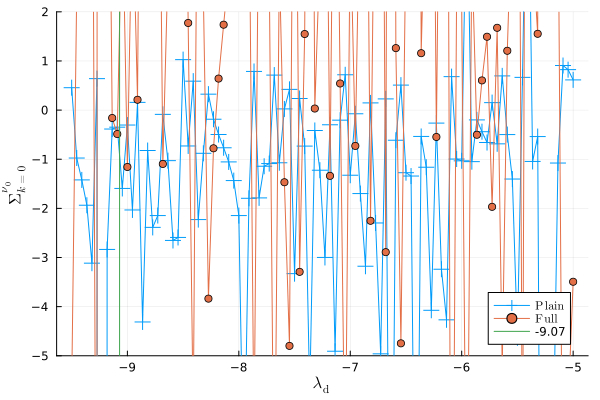

In [40]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-5,2), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
#plot!(λd_range, se_etc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Step}")
vline!([-9.07], label="-9.07")

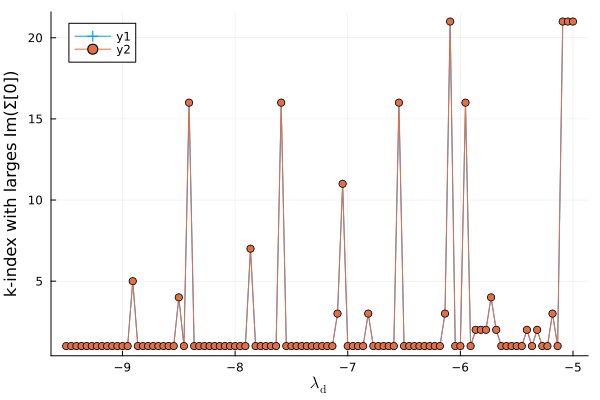

In [41]:
plot(λd_range,largest_ind_ntc, markershape=:auto,  xlabel=L"\lambda_\mathrm{d}", ylabel="k-index with larges Im(Σ[0])")
plot!(λd_range,largest_ind_ftc, markershape=:auto)

In [42]:
λd_range = LinRange(-10.5, 30.0, 100)
se_ntc_list = []
se_ftc_list = []
#se_etc_list = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    push!(se_ntc_list, imag(se_ntc[1,0]))
    push!(se_ftc_list, imag(se_ftc[1,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

LoadError: TypeError: in keyword argument tc, expected Type{<:ΣTail}, got a value of type Symbol

In [43]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-3,1), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
vline!([-9.37], label="-9.07", linewidth=3)

In [44]:
function get_λd_min(χm::χT, γm::γT, χd::χT, γd::γT, λ₀::Array{ComplexF64,3}, h::lDΓAHelper; 
                    λd_max::Float64=0.0, Δλ::Float64 = 1e-1, dΣ0_max::Float64=0.5, dΣ0_threshold::Float64=4.0)::Float64
    nh = ω0_index(χd)
    Nq = length(h.kG.kMult)
    λd_min0 = -minimum(1 ./ view(χd, :, nh)) + Δλ
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, 1), 1:Nq, 0:0)
    
    λd_max = (λd_max - λd_min0) < 5 ? λd_max + 5 : λd_max
    λd_max_result = λd_max
    
    λd_grid = reverse(LinRange(λd_min0, λd_max, ceil(Int, (λd_max-λd_min0)/Δλ)))
    Σ0_λ_i::Float64 = NaN
    Σ0_λ_im::Float64 = NaN
    dΣ0_λ_last::Float64 = 0.0
    dΣ0_max::Float64 = 0.0
    
    for (i,λd_i) in enumerate(λd_grid)
        rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
        λm_i =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
        (λm_i != 0) && χ_λ!(χm, λm_i)
        (λd_i != 0) && χ_λ!(χd, λd_i)
        calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, 0.0, h.gLoc_rfft, h.kG, h.mP, h.sP)
        (λm_i != 0) && reset!(χm)
        (λd_i != 0) && reset!(χd)
        Σ0_λ_i, ind = findmax(imag(Σ_ladder[:,0]))
        if i > 1
            dΣ0_λ_last = abs((Σ0_λ_im - Σ0_λ_i)/(λd_grid[i-1] - λd_grid[i]))
            Σ0_λ_im = Σ0_λ_i
        end
        if i > 2 && (Σ0_λ_i > 0 || dΣ0_λ_last > dΣ0_threshold)
            λd_max_result = λd_i
            break
        end
    end
    return λd_max_result
end

get_λd_min (generic function with 1 method)